# Python, tell me a Joke

The `jester` dataset contains ~25k users and their opinions on 100 jokes.

Not every user has rated every joke, but the goal is to use the exisitng ratings to predict how a given user would rate a given joke.




### Jester dataset


Website: http://eigentaste.berkeley.edu/dataset/

Data file: http://eigentaste.berkeley.edu/dataset/jester_dataset_1_1.zip

Jokes: http://eigentaste.berkeley.edu/dataset/jester_dataset_1_joke_texts.zip

In [1]:
import pandas as pd
import numpy as np 

columns = ['tally'] + [f'joke_{i}' for i in list(range(1,101))]

df = pd.read_excel('/Users/mkleinbort/Downloads/jester-data-1.xls', encoding='latin', names=columns)

# In this dataset, a rating of 99 implies the user did not rate that joke
df.loc[:,'joke_1':] = df.loc[:,'joke_1':].applymap(lambda x: np.nan if x == 99.0 else x)

In [2]:
df.head()

,tally,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,joke_9,...,joke_91,joke_92,joke_93,joke_94,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100
0,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
1,49,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
2,48,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
3,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
4,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


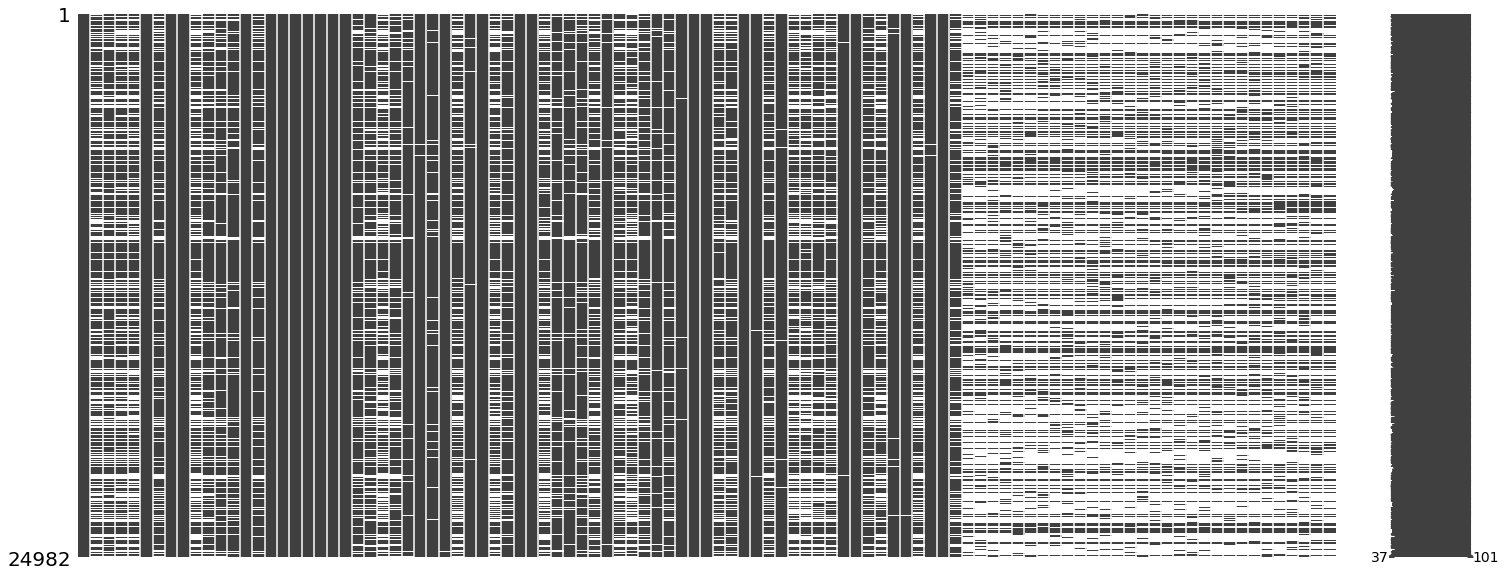

In [4]:
import missingno as msgn
msgn.matrix(df)

Note: 'tally' is the number of jokes a user has rated, the scale for 'funnyness' is -10 to 10

In [5]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
tally,24982.0,72.467417,21.860035,36.00,53.00,72.00,100.00,100.00
joke_1,16451.0,0.905104,5.171508,-9.95,-2.67,1.60,4.90,9.37
joke_2,18183.0,0.207988,5.597119,-9.95,-4.42,0.83,4.81,9.37
joke_3,16641.0,0.317174,5.399415,-9.95,-4.03,0.78,4.66,9.37
joke_4,15607.0,-1.448684,5.234546,-9.95,-5.87,-1.46,2.52,9.37


# Goal
Minimize MSE, where the error is defined as the discrepancy between a user's rating of a joke, and the system's prediction of that user's rating.

### Surprise

A helpful library, though still early in its development.

In [6]:
data_for_surprise = df.drop(['tally'], axis=1).melt().reset_index().dropna()

In [7]:
data_for_surprise.head()

,index,variable,value
0,0,joke_1,4.08
3,3,joke_1,8.50
4,4,joke_1,-6.17
6,6,joke_1,6.84
7,7,joke_1,-3.79


In [8]:
from surprise import Dataset, Reader

data = Dataset.load_from_df(data_for_surprise, Reader(rating_scale=(-10,10)))

In [9]:
from surprise import SVD

# An algorithm for collaborative recomendations based on matrix factorization
model = SVD()

In [10]:
%%time
from surprise.model_selection import cross_validate

results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.9891  4.9893  4.9970  4.9897  4.9951  4.9920  0.0033  
Fit time          96.56   104.56  106.44  105.20  93.71   101.30  5.14    
Test time         3.63    3.97    3.88    3.98    2.97    3.69    0.38    
CPU times: user 9min 6s, sys: 7.54 s, total: 9min 14s
Wall time: 9min 18s
